# **Final Python Notebook 3**

### Author - Sanuli Gehara Jayasekara

### Student ID - 20220855 / w2053019

### Peer Reviewer - Miyuni Lowe


**Reference**

* Code Reuse Session 3 Code - Below Blocks:

'
 import pandas as pd
 data = pd.read_csv('/DataFilePath/DataFileName.csv')
  data.head()
'

In [65]:
# Import pandas library as pd to load and access the dataset
import pandas as pd

# Load the classification dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW Notebooks/datasets/cleaned/cleaned_classification_data.csv')

# Inspect the dataset
print("Dataset info:")
print(df.info())

# Display first 5 rows of the dataset
print("\nFirst few rows:")
df.head()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4018 non-null   int64
 1   Sex                     4018 non-null   int64
 2   T_Stage                 4018 non-null   int64
 3   N_Stage                 4018 non-null   int64
 4   6th_Stage               4018 non-null   int64
 5   Differentiated          4018 non-null   int64
 6   Grade                   4018 non-null   int64
 7   A_Stage                 4018 non-null   int64
 8   Tumor_Size              4018 non-null   int64
 9   Estrogen_Status         4018 non-null   int64
 10  Progesterone_Status     4018 non-null   int64
 11  Regional_Node_Examined  4018 non-null   int64
 12  Reginol_Node_Positive   4018 non-null   int64
 13  Mortality_Status        4018 non-null   int64
dtypes: int64(14)
memory usage: 439.6 KB
None

First few rows:


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,1,3,1,4,1,1,24,1,0
1,50,0,1,1,2,0,2,1,35,1,1,14,5,0
2,58,0,2,2,4,0,2,1,63,1,1,14,7,0
3,58,0,0,0,0,1,3,1,18,1,1,2,1,0
4,47,0,1,0,1,1,3,1,41,1,1,3,1,0


In [66]:
#Display the basic stats
df.astype('object').describe().transpose()

,count,unique,top,freq
Age,4018,40,46,162
Sex,4018,2,0,3999
T_Stage,4018,4,1,1784
N_Stage,4018,3,0,2729
6th_Stage,4018,5,0,1304
Differentiated,4018,4,0,2347
Grade,4018,4,2,2347
A_Stage,4018,2,1,3927
Tumor_Size,4018,110,15,271
Estrogen_Status,4018,2,1,3749


**Reference**



*   Below Code Blocks from Code Reuse Session 3


 ''
 feature_cols = ['input_feature1_name', 'input_feature2_name', 'input_feature3_name', 'input_feature4_name', ...]

X = data[feature_cols] # Features
y = data['target_feature_name']''

In [67]:
# Separate features and target from the dataset
feature_columns = ['Age',	'Sex',	'T_Stage',	'N_Stage',	'6th_Stage',	'Differentiated',	'Grade',	'A_Stage',	'Tumor_Size',	'Estrogen_Status',	'Progesterone_Status',	'Regional_Node_Examined',	'Reginol_Node_Positive']

x1 = df[feature_columns]
y = df['Mortality_Status']  # Storing the target variable

## Transform Inputs Variables (Scaling)

There is a difference in input values in this classification dataset, this can impact the logistic regression performance.

So, used standardization (z-score normalization) to scale input features

**Reference**



*   Seminar 3 -  'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
 *  (Build a Logistic Regression (LR) model to predict patient’s diabetes diagnoses Task - 3. Scale your input variables sub section)



In [68]:
# import StandardScaler library
from sklearn.preprocessing import StandardScaler

# Inititalize StandardScaler
scaler = StandardScaler()

# Scale only the input variables
X = scaler.fit_transform(x1)

## Split Data into Training and Testing Sets

Here we do an 80/20 split with a chosen random_state. We also typically use stratify=y for classification tasks.

**Reference**



*   from sklearn.model_selection import train_test_split

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=value, random_state=value, stratify=y)



In [69]:
# Importing train_test_split function from scikit-learn for dataset splitting
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (3214, 13)
Test set size: (804, 13)


In [70]:
# Build Two Base Learners
from sklearn.naive_bayes import GaussianNB # for Naive Baiyes
from sklearn.linear_model import LogisticRegression # for Logistic regressor

# Initialize the models
nb_clf = GaussianNB()
lr_clf = LogisticRegression(max_iter=1000)

# Train modls on training data
nb_clf = nb_clf.fit(X_train, y_train)
lr_clf = lr_clf.fit(X_train, y_train)



Classification report for NB
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       681
           1       0.29      0.37      0.33       123

    accuracy                           0.77       804
   macro avg       0.59      0.60      0.59       804
weighted avg       0.79      0.77      0.78       804

confusion_matrix for NB


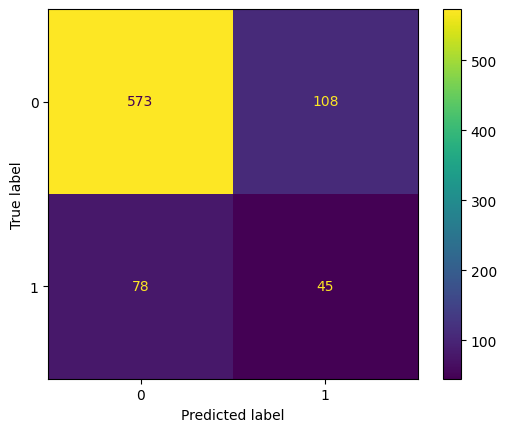

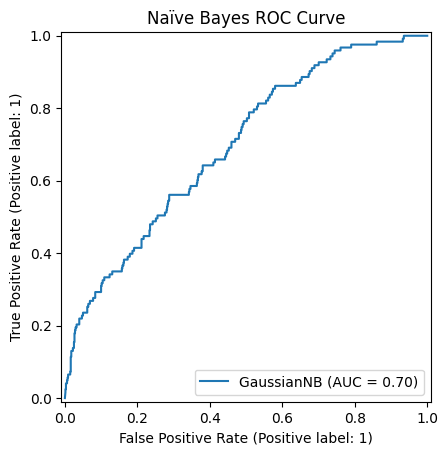

In [71]:
# predict on test data
y_pred_nb=nb_clf.predict(X_test)

# Evaluate the NB model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Importing matplotlib for plotting

# Classification report for NB
print("Classification report for NB")
print(classification_report(y_test,y_pred_nb))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for NB
print("confusion_matrix for NB")
nb_cm=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=nb_cm,display_labels=nb_clf.classes_)
disp.plot()

# Generating and displaying the ROC curve for the naives bayes model.
RocCurveDisplay.from_estimator(nb_clf, X_test, y_test)
plt.title("Naïve Bayes ROC Curve")
plt.show()

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       681
           1       0.64      0.11      0.19       123

    accuracy                           0.85       804
   macro avg       0.75      0.55      0.56       804
weighted avg       0.83      0.85      0.81       804

confusion_matrix for Logistic Regression


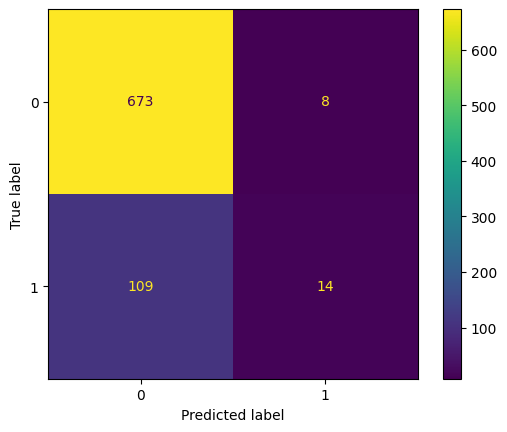

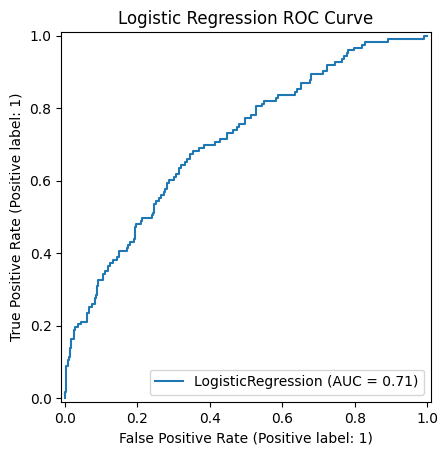

In [72]:
# Evaluating the LR model by generating the classification report and the confusion matrix
# predict on test data
y_pred_lr=lr_clf.predict(X_test)

# Classification report for lr
print("Classification report for Logistic Regression")
print(classification_report(y_test,y_pred_lr))

# confusion matrix for lr
print("confusion_matrix for Logistic Regression")
lr_cm=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr_clf.classes_)
disp.plot()

# roc curve for lr
RocCurveDisplay.from_estimator(lr_clf, X_test, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()

**Reference**



*   Below Code block from Code reuse session 3

''
from sklearn.ensemble import VotingClassifier

base_learners=[('Algorithm1', Algorithm1), ('Algorithm2', Algorithm2)]

ensemble_learner = VotingClassifier(base_learners, voting='soft')''

In [73]:
# Instantiate and Fit the Voting Classifier
from sklearn.ensemble import VotingClassifier

# Build a dictionary of base learners
base_learners = [('NB', nb_clf), ('LR', lr_clf)]

# Instantiate the ensemble model and create voting classifier, and train model
ensemble_learner = VotingClassifier(estimators=base_learners, voting='hard')  # hard

# fit the model to training data
ensemble_learner.fit(X_train, y_train)


VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('LR', LogisticRegression(max_iter=1000))])

## Evaluate the Ensemble Model

Evaluate the evaluation of the ensemble model by displaying accuracy score, confusion matrix, ROC Curve Display and classification reoprt

**Reference**



*   Below code block from Code Reuse Session 3:

''
ensemble_learner.fit(X_train, y_train)

y_pred_ensemble_learner = ensemble_learner.predict(X_test)

from sklearn.metrics import accuracy_score



ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)



print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

 from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay



ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)



ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,display_labels=ensemble_learner.classes_)



ensemble_learner_disp.plot()



ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")
''



Ensemble Classifier Accuracy: 0.8544776119402985

Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       681
           1       0.64      0.11      0.19       123

    accuracy                           0.85       804
   macro avg       0.75      0.55      0.56       804
weighted avg       0.83      0.85      0.81       804



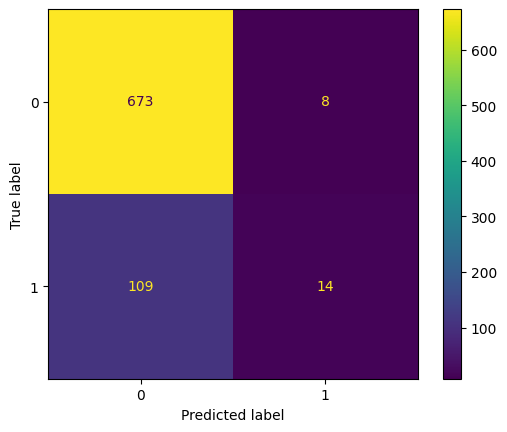

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict using the ensemble classifier.
y_pred_ensemble = ensemble_learner.predict(X_test)

# Calculate and print the accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Classifier Accuracy:", ensemble_accuracy)

# Print the classification report
print("\nEnsemble Classifier - Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Display the confusion matrix
ensemble_cm = confusion_matrix(y_test, y_pred_ensemble)
ensemble_disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_cm, display_labels=ensemble_learner.classes_)
ensemble_disp.plot()


# Decision Tree Regression for Predicting Survival Months

## Load and Prepare the Regression Data

Load the regression dataset and clean it again by droping irrelavant columns and replacing values etc.

**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 3

In [75]:
import pandas as pd

# Load the cleaned regression dataset
df_reg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW Notebooks/datasets/cleaned/cleaned_regression_data.csv')

print("Dataset Info:")
print(df_reg.info())

print("\nFirst five rows:")
display(df_reg.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4018 non-null   int64
 1   Sex                     4018 non-null   int64
 2   T_Stage                 4018 non-null   int64
 3   N_Stage                 4018 non-null   int64
 4   6th_Stage               4018 non-null   int64
 5   Differentiated          4018 non-null   int64
 6   Grade                   4018 non-null   int64
 7   A_Stage                 4018 non-null   int64
 8   Tumor_Size              4018 non-null   int64
 9   Estrogen_Status         4018 non-null   int64
 10  Progesterone_Status     4018 non-null   int64
 11  Regional_Node_Examined  4018 non-null   int64
 12  Reginol_Node_Positive   4018 non-null   int64
 13  Survival_Months         4018 non-null   int64
dtypes: int64(14)
memory usage: 439.6 KB
None

First five rows:

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
0,68,0,0,0,0,1,3,1,4,1,1,24,1,60
1,50,0,1,1,2,0,2,1,35,1,1,14,5,62
2,58,0,2,2,4,0,2,1,63,1,1,14,7,75
3,58,0,0,0,0,1,3,1,18,1,1,2,1,84
4,47,0,1,0,1,1,3,1,41,1,1,3,1,50


**Reference**

*   Code reuse session 3

In [76]:
from sklearn.model_selection import train_test_split

# Define features and target for regression
X_reg = df_reg.drop(['Survival_Months'], axis=1)
y_reg = df_reg['Survival_Months']

# Split data into training (80%) and testing (20%) sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression training set shape:", Xr_train.shape)
print("Regression test set shape:", Xr_test.shape)

Regression training set shape: (3214, 13)
Regression test set shape: (804, 13)


## DT1 - Build and Evaluate the Fully-Grown Decision Tree Regressor



**Reference**

*   Code reuse session 3 - Below Code Block:

''
DT_regressor = DecisionTreeRegressor()

DT_regressor.fit(X_train, y_train)

y_pred = DT_regressor.predict(X_test)
''

* For Evaluation this code block was used

''
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R2:', metrics.r2_score(y_test, y_pred))
''


DT1 Performance on Test Set:
Mean Absolute Error: 26.796641791044777
Mean Squared Error: 1646.4449626865671
R² Score: -2.1273627508812627
Depth of DT1: 30


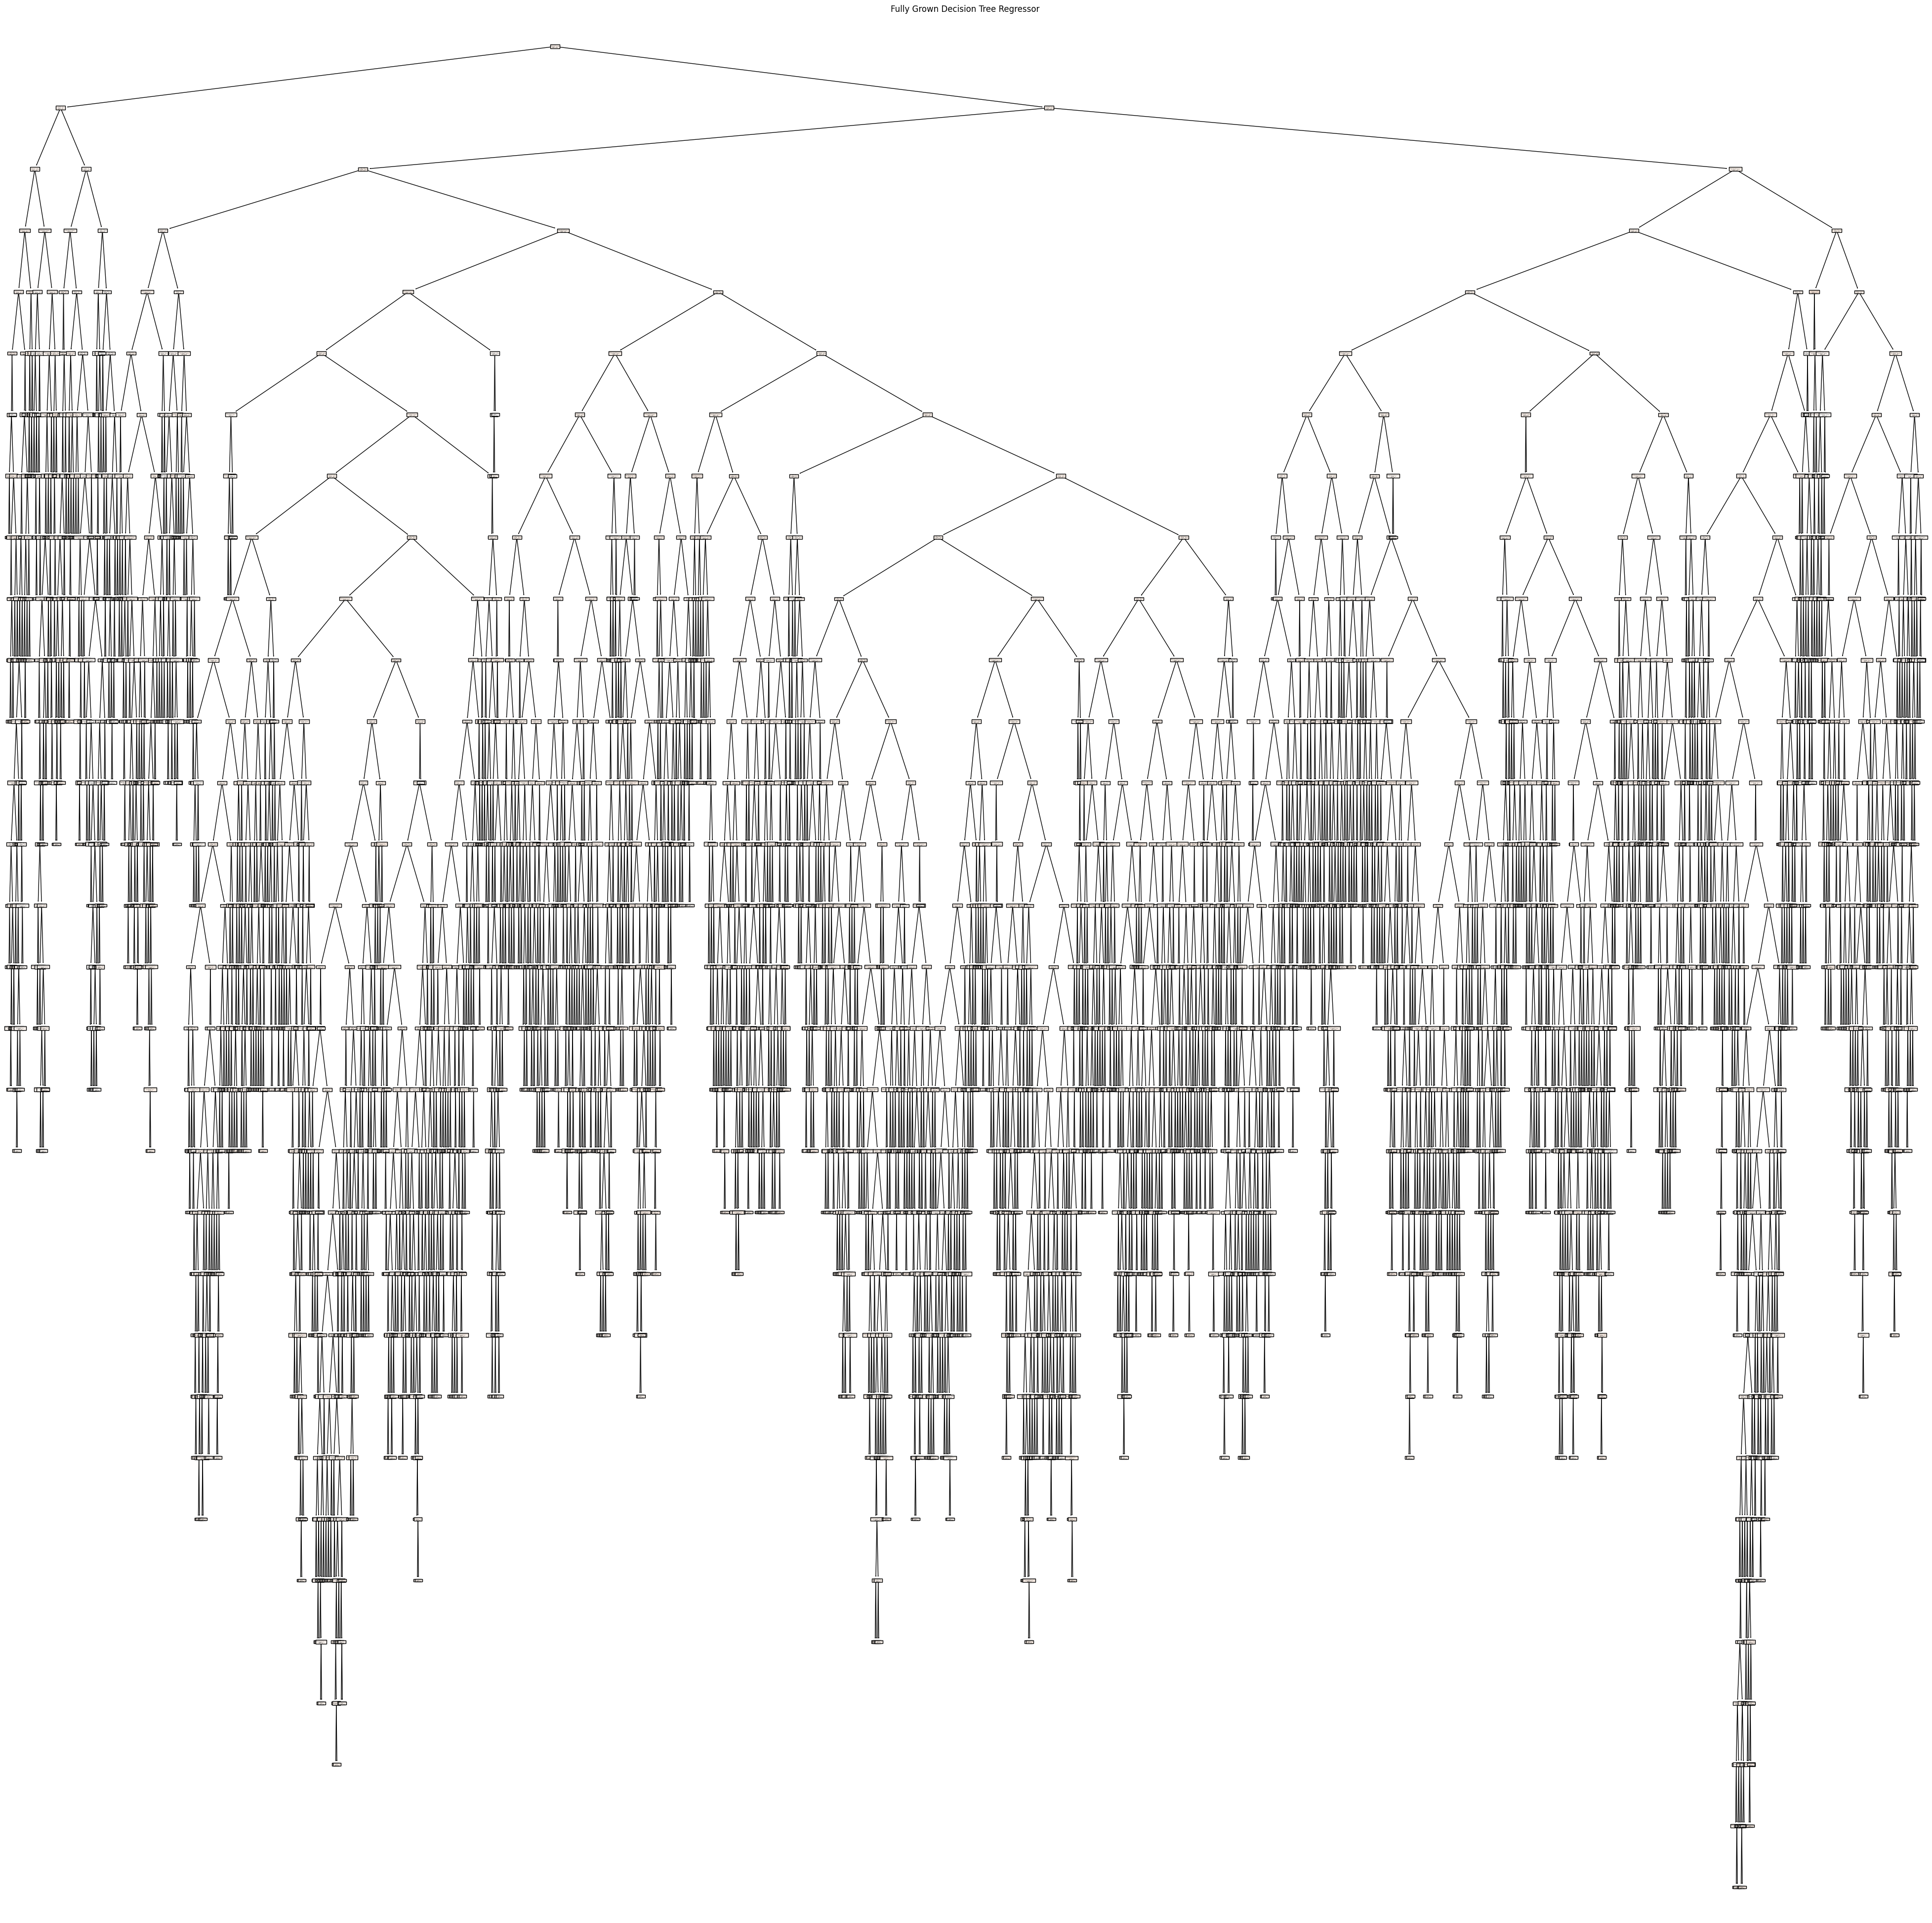

<Figure size 640x480 with 0 Axes>

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate and train a fully-grown decision tree regressor
dt_reg_full = DecisionTreeRegressor()
dt_reg_full.fit(Xr_train, yr_train)

# Predict on the test set
yr_pred_full = dt_reg_full.predict(Xr_test)

# Evaluate the fully-grown tree model
print("DT1 Performance on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(yr_test, yr_pred_full))
print("Mean Squared Error:", mean_squared_error(yr_test, yr_pred_full))
print("R² Score:", r2_score(yr_test, yr_pred_full))

# Print the depth of the fully grown tree
print("Depth of DT1:", dt_reg_full.tree_.max_depth)

# Plot the pruned decision tree and save as an image
plt.figure(figsize=(50, 50))
plot_tree(dt_reg_full, feature_names=list(Xr_train.columns), filled=True)
plt.title("Fully Grown Decision Tree Regressor")
plt.show()

# Save the DT graph as a png image
plt.savefig("full_decision_tree_regressor.png")


## DT2 - Build and Evaluate a Pruned Decision Tree Regressor

**Reference**

*   Code reuse session 3


DT2 (max_depth=4) Performance on Test Set:
Mean Absolute Error: 18.538761801197406
Mean Squared Error: 522.1249332049442
R² Score: 0.008242544137590402


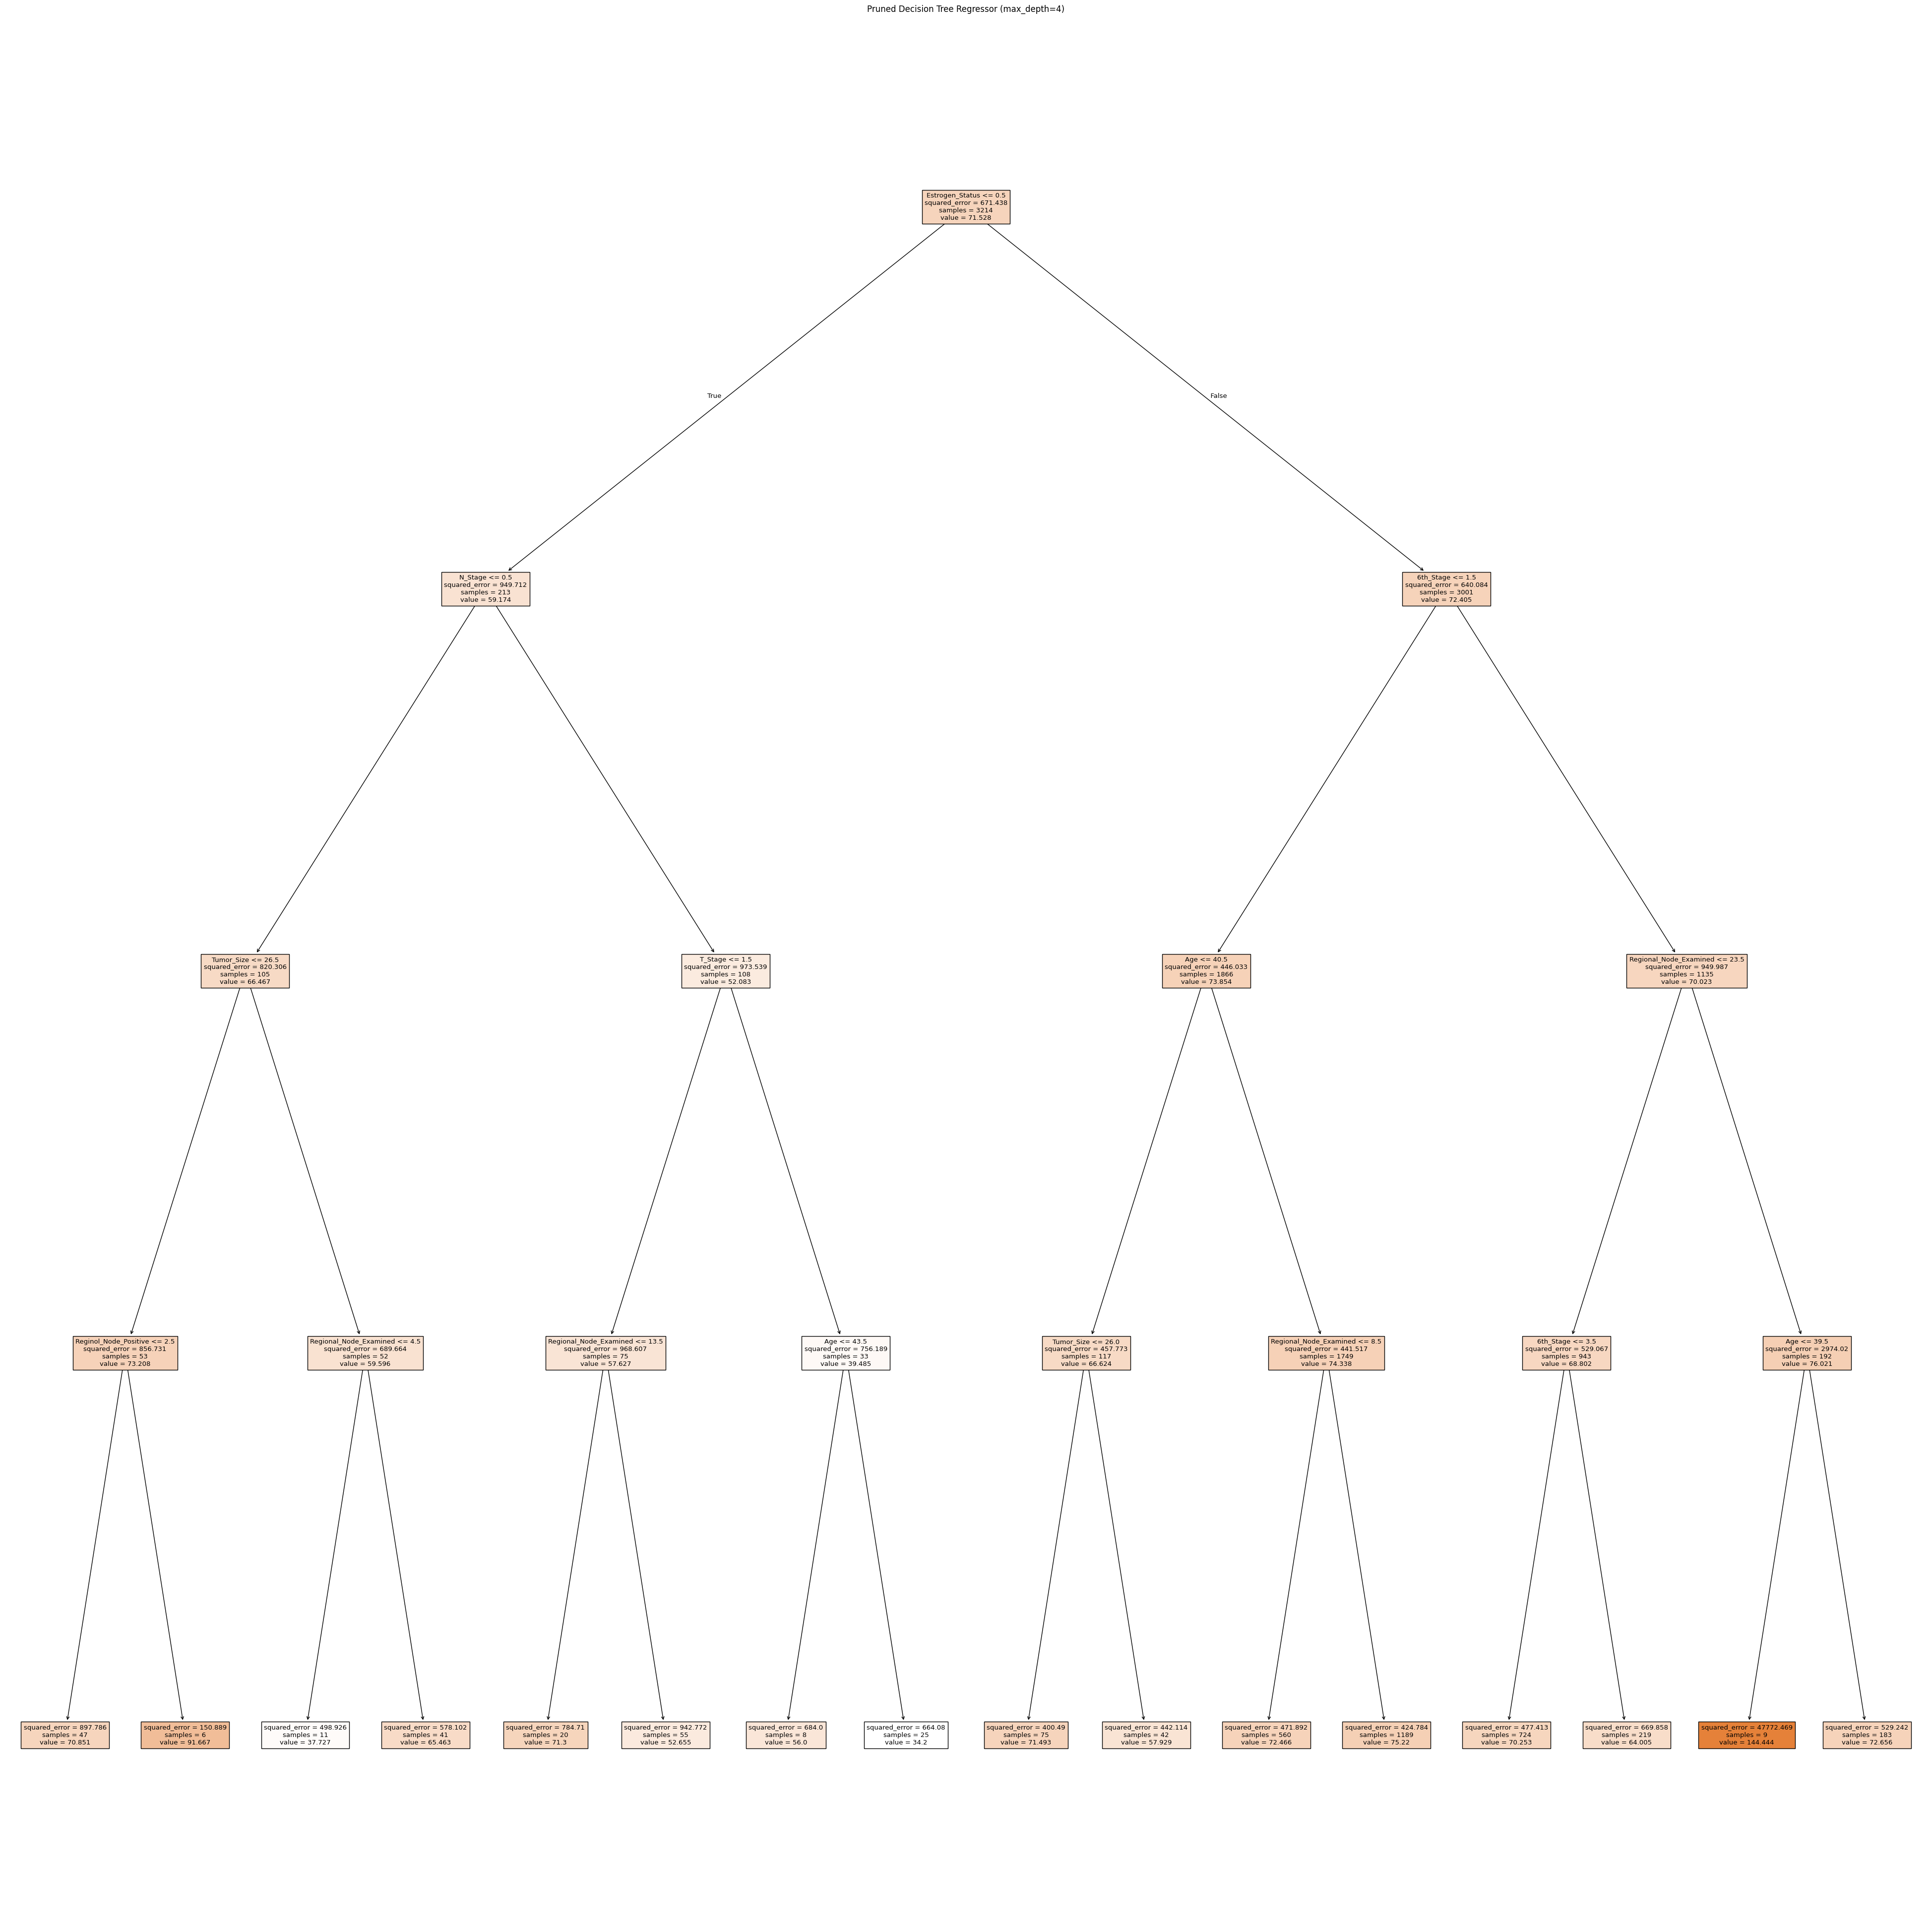

<Figure size 640x480 with 0 Axes>

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Instantiate and train a pruned decision tree with max_depth=4 (example choice)
dt_reg_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_reg_pruned.fit(Xr_train, yr_train)

# Predict on the test set using the pruned tree
yr_pred_pruned = dt_reg_pruned.predict(Xr_test)

# Evaluate the pruned tree model
print("\nDT2 (max_depth=4) Performance on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(yr_test, yr_pred_pruned))
print("Mean Squared Error:", mean_squared_error(yr_test, yr_pred_pruned))
print("R² Score:", r2_score(yr_test, yr_pred_pruned))

# Plot the pruned decision tree and save as an image
plt.figure(figsize=(50, 50))
plot_tree(dt_reg_pruned, feature_names=list(Xr_train.columns), filled=True)
plt.title("Pruned Decision Tree Regressor (max_depth=4)")
plt.show()

# Save the DT graph as a png image
plt.savefig("pruned_decision_tree_regressor.png", dpi=300, bbox_inches='tight')



# Conclusion on pruned decision tree regressor's evaluation

- The pruned decision tree with a maximum depth of 4 shows several notable improvements and trade-offs compared to the fully grown tree.

- In summary, pruning the decision tree to a max_depth of 4 improved the error metrics (MAE, MSE, R2), indicating that predictions are closer on average to the actual values and that large errors have been reduced.

- The drastic shift from a negative R² to an approximately zero R² confirms that overfitting was a major problem in the fully grown tree, so the pruned tree generalizes better